In [4]:
import serial
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
t = np.arange(0, 999, 1)
data = []

In [6]:
PORT = 0
while True:
    try:
        RGBcircuit = serial.Serial("COM"+str(PORT), baudrate=9600, timeout=1)
        break
    except:
        PORT = PORT + 1
print("PORT Connected to COM" + str(PORT))

for index in range(1000):
    try:
        tempData = list(map(int ,RGBcircuit.readline().decode()[:-1].split(", ")))
        data.append(tempData)
    
        if index % 100 == 0:
            print("Progress -> {} %".format(index / 10))

    except UnicodeDecodeError:
        pass

    except KeyboardInterrupt:
        exit()

RGBcircuit.close()

PORT Connected to COM6
Progress -> 10.0 %
Progress -> 20.0 %
Progress -> 30.0 %
Progress -> 40.0 %
Progress -> 50.0 %
Progress -> 60.0 %
Progress -> 70.0 %
Progress -> 80.0 %
Progress -> 90.0 %


In [7]:
data = np.array(data, dtype="int16")

In [8]:
average = np.mean(data, axis=1)


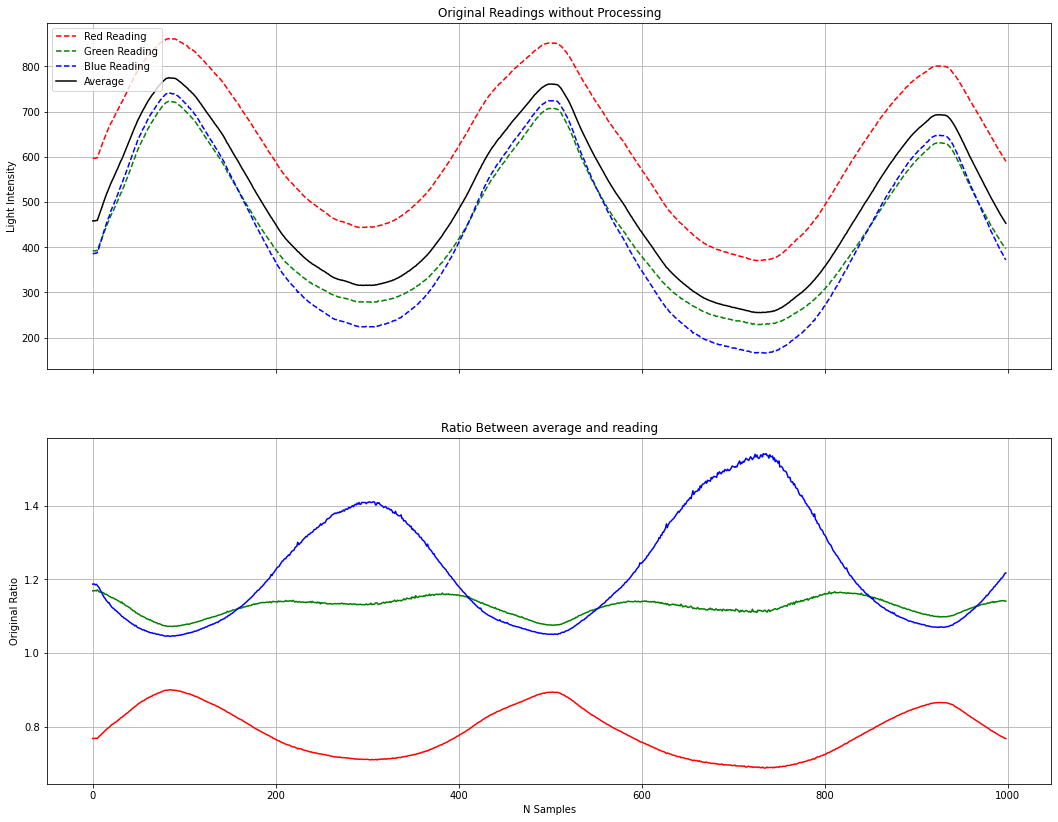

In [9]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize = (18, 14))

ax[1].set_xlabel("N Samples")

ax[0].set_title("Original Readings without Processing")
ax[0].set_ylabel("Light Intensity")
ax[0].plot(t, data[:, 0], 'r--', label="Red Reading")
ax[0].plot(t, data[:, 1], 'g--', label="Green Reading")
ax[0].plot(t, data[:, 2], 'b--', label="Blue Reading")
ax[0].plot(t, average, 'k', label="Average")
ax[0].grid()
ax[0].legend(loc = 'upper left')


ax[1].set_title("Ratio Between average and reading")
ax[1].set_ylabel("Original Ratio")
ax[1].plot(t, average / data[:, 0], 'r')
ax[1].plot(t, average / data[:, 1], 'g')
ax[1].plot(t, average / data[:, 2], 'b')
ax[1].grid()

plt.show()

In [29]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize = (18, 14))

ax[1].set_xlabel("N Samples")

ax[0].set_title("Original Readings without Processing")
ax[0].set_ylabel("Light Intensity")
ax[0].plot(t, data[:, 0], 'r--', label="Red Reading")
ax[0].plot(t, data[:, 1], 'g--', label="Green Reading")
ax[0].plot(t, data[:, 2], 'b--', label="Blue Reading")
ax[0].plot(t, average, 'k', label="Average")
ax[0].grid()
ax[0].legend(loc = 'upper left')


ax[1].set_title("Ratio Between average and reading")
ax[1].set_ylabel("Original Ratio")
ax[1].plot(t, average / data[:, 0], 'r')
ax[1].plot(t, average / data[:, 1], 'g')
ax[1].plot(t, average / data[:, 2], 'b')
ax[1].grid()

plt.show()